<center>

Escuela Politécnica Nacional

Análisis Numérico No Lineal

2025 B

</center>

**Nombre:** Alomoto Rivera Martin Sebastian.

**Tema:**   Prueba Laboratorio - Segundo Bimestre.

**Fecha:** 30 de Enero del 2026.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Ejercicio 1:

Se quiere aproximar la integral
$$I =\int_{-1}^{1} |x|e^x dx,$$
utilizando diversos métodos numéricos.

**a) Considerar el método de sumas de Riemann superior o inferior, y obtener la aproximación numérica de la integral propuesta. Para ello, se debe partir el intervalo de integración en dos subintervalos adecuados que permitan la incorporación de sumas superiores o inferiores según sea el caso. Argumentar por qué es independiente la elección de las sumas superiores o inferiores para aproximar la integral.**

Comencemos apreciando la forma de la función en el intervalo de integración:

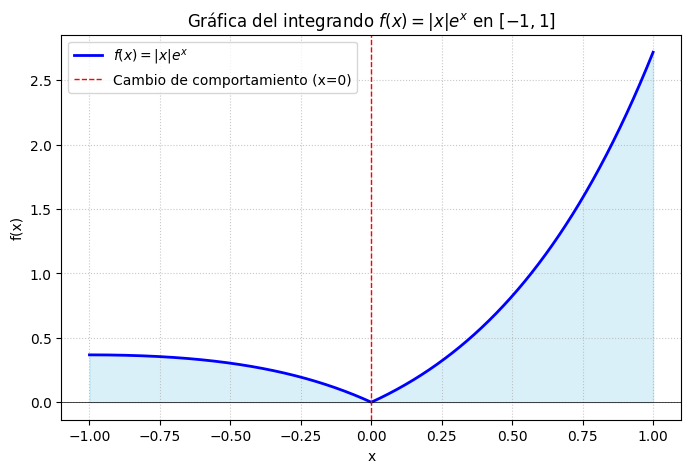

In [51]:
x = np.linspace(-1, 1, 1000)
y = np.abs(x) * np.exp(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$f(x) = |x|e^x$', color='blue', linewidth=2)

plt.title('Gráfica del integrando $f(x) = |x|e^x$ en $[-1, 1]$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5) # Eje X
plt.axvline(0, color='red', linestyle='--', linewidth=1, label='Cambio de comportamiento (x=0)') # Eje Y central
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()

plt.fill_between(x, y, color='skyblue', alpha=0.3)
plt.show()

Ahora, recordemos en que consistía la técnica de suma de Riemann inferior y superior:

Sea una función continua $f$ en $[a,b]$ y una partición con $n$ subintervalos de ancho $\Delta x_i = x_{i+1}-x_i$.
- Suma superior: $S_n = \sum_{i=0}^{n-1} M_i\,\Delta x_i$, donde $M_i = \sup\{f(x): x\in[x_i,x_{i+1}]\}$.
- Suma inferior: $s_n = \sum_{i=0}^{n-1} m_i\,\Delta x_i$, donde $m_i = \inf\{f(x): x\in[x_i,x_{i+1}]\}$.

Estas sumas acotan la integral cuando $f\ge 0$: 
$$ s_n \le \int_a^b f(x)\,dx \le S_n,\qquad S_n - s_n \xrightarrow[n\to\infty]{} 0.$$
**Por continuidad de $f$, ambas secuencias convergen al mismo valor de la integral, por lo que la elección entre “superior” e “inferior” es independiente para aproximar la integral si se refinan los nodos.**

Ahora, para nuestro caso, $f(x)=|x|e^x$ en $[-1,1]$:
- $f$ es decreciente en $[-1,0]$ y creciente en $[0,1]$ (cambia de monotonía en $x=0$).
- Al partir en dos subintervalos $[-1,0]$ y $[0,1]$, los supremos e ínfimos en cada subintervalo coinciden con los valores en los extremos (por monotonía). Así, las sumas superior e inferior se construyen fácilmente con los endpoints y, al refinar la partición, ambas aproximaciones convergen al mismo valor de la integral.

Implementemos esta idea:

In [52]:
def f(x):
    return np.abs(x) * np.exp(x)

# Sumas superior e inferior en un subintervalo [a,b] con n subintervalos uniformes
def riemann_sup_inf_sub(f, a, b, n):
    x = np.linspace(a, b, n + 1)
    dx = (b - a) / n
    f_left = f(x[:-1])
    f_right = f(x[1:])
    M = np.maximum(f_left, f_right)  # supremo
    m = np.minimum(f_left, f_right)  # ínfimo
    S = np.sum(M) * dx
    s = np.sum(m) * dx
    return S, s

# Combinación en [-1,0] y [0,1]
def riemann_sup_inf_total(f, n_left=100, n_right=100):
    S1, s1 = riemann_sup_inf_sub(f, -1.0, 0.0, n_left)
    S2, s2 = riemann_sup_inf_sub(f,  0.0, 1.0, n_right)
    return (S1 + S2), (s1 + s2)

# Valor exacto usando cuadratura de alta precisión
exact, _ = quad(lambda x: np.abs(x) * np.exp(x), -1.0, 1.0)

print("Valor exacto:", exact)

# Barrido de nodos para ver convergencia y acotación
for n in [10, 20, 50, 100, 200, 500]:
    S, s = riemann_sup_inf_total(f, n, n)


# #Resultados
# ns = [10, 20, 50, 100, 200, 500]
# print("| n | s (inferior) | S (superior)  | err_S | err_s |")
# print("|---:|---:|---:|---:|---:|")
# for n in ns:
#     S, s = riemann_sup_inf_total(f, n, n)
#     print(f"| {n} | {s:.10f} | {S:.10f}  | {abs(S-exact):.3e} | {abs(s-exact):.3e} |")

Valor exacto: 1.2642411176571153


Los resultados son los siguientes:

Valor exacto (Utilizando la librería Scipy): 
$$
I= 1.264241...
$$


| n | s (inferior) | S (superior)  | err_S | err_s |
|---:|---:|---:|---:|---:|
| 10 | 1.1127960785 | 1.4214122054  | 1.572e-01 | 1.514e-01 |
| 20 | 1.1878029880 | 1.3421110515  | 7.787e-02 | 7.644e-02 |
| 50 | 1.2334940558 | 1.2952172812  | 3.098e-02 | 3.075e-02 |
| 100 | 1.2488389493 | 1.2797005620  | 1.546e-02 | 1.540e-02 |
| 200 | 1.2565328740 | 1.2719636803  | 7.723e-03 | 7.708e-03 |
| 500 | 1.2611561019 | 1.2673284244  | 3.087e-03 | 3.085e-03 |

**b) Utilizar los métodos de punto medio, trapezoide, y Cavalieri-Simpson para realizar la aproximación de la integral.**

Sea $[a,b]$ con $n$ subintervalos uniformes y $h=\frac{b-a}{n}$.

- Punto medio: $M_n = h\sum_{i=0}^{n-1} f\!\left(a+\left(i+\tfrac{1}{2}\right)h\right)$.
- Trapecio: $T_n = h\left[\tfrac{1}{2}f(a)+\sum_{i=1}^{n-1} f(a+ih)+\tfrac{1}{2}f(b)\right]$.
- Simpson (Cavalieri-Simpson, requiere $n$ par):
  $S_n = \frac{h}{3}\left[f(a)+f(b)+4\sum_{\text{odd }i} f(a+ih)+2\sum_{\text{even }i} f(a+ih)\right]$.

La implementación en Python es:

In [53]:
# Reglas compuestas
def comp_midpoint(f, a, b, n):
    h = (b - a) / n
    mids = a + (np.arange(n) + 0.5) * h
    return h * np.sum(f(mids))

def comp_trapezoid(f, a, b, n):
    h = (b - a) / n
    x = a + np.arange(n + 1) * h
    y = f(x)
    return h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])

def comp_simpson(f, a, b, n):
    assert n % 2 == 0, "Simpson requiere n par."
    h = (b - a) / n
    x = a + np.arange(n + 1) * h
    y = f(x)
    return (h / 3) * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))

# Valor exacto
exact, _ = quad(lambda x: np.abs(x) * np.exp(x), -1.0, 1.0)

# #Resultados
# ns = [10, 20, 50, 100, 200, 500]
# print("| n | Punto medio | Trapecio | Simpson  | err_PM | err_T | err_S |")
# print("|---:|---:|---:|---:|---:|---:|---:|")
# for n in ns:
#     pm = comp_midpoint(f, -1.0, 1.0, n)
#     tr = comp_trapezoid(f, -1.0, 1.0, n)
#     sm = comp_simpson(f, -1.0, 1.0, n)
#     print(f"| {n} | {pm:.6f} | {tr:.6f} | {sm:.6f}  | "
#           f"{abs(pm-exact):.3e} | {abs(tr-exact):.3e} | {abs(sm-exact):.3e} |")

Obtuvimos los siguientes resultados:

| n | Punto medio | Trapecio | Simpson  | err_PM | err_T | err_S |
|---:|---:|---:|---:|---:|---:|---:|
| 10 | 1.258524 | 1.275684 | 1.251090  | 5.717e-03 | 1.144e-02 | 1.315e-02 |
| 20 | 1.262810 | 1.267104 | 1.264244  | 1.431e-03 | 2.863e-03 | 3.111e-06 |
| 50 | 1.264012 | 1.264699 | 1.263708  | 2.291e-04 | 4.582e-04 | 5.330e-04 |
| 100 | 1.264184 | 1.264356 | 1.264241  | 5.727e-05 | 1.146e-04 | 4.985e-09 |
| 200 | 1.264227 | 1.264270 | 1.264241  | 1.432e-05 | 2.864e-05 | 3.116e-10 |
| 500 | 1.264239 | 1.264246 | 1.264241  | 2.291e-06 | 4.582e-06 | 7.977e-12 |

Claramente se puede apreciar la reducción del error en los métodos.

**c) En este literal queremos hacer una comparación de la cantidad de nodos que se deben tomar en $[-1, 1]$ para alcanzar una precisión deseada. Suponiendo que se quiere que el valor estimado tenga una precisión de al menos 7 cifras decimales respecto al valor exacto, calcular experimentalmente el número de nodos que se debe tener para alcanzar al menos la precisión deseada. Reportar en un gráfico en conjunto de los 4 métodos, la evolución del valor numérico de la integral versus el número de nodos**

Para este experimento: Mediremos el error absoluto contra el valor exacto y aumentamos n para cada método hasta alcanzar la tolerancia de 7 decimales. Luego graficamos cómo converge el valor de la integral conforme crece n.


N mínimos (≈7 decimales):
- Riemann inf: n ≈ 33554432
- Punto medio: n ≈ 4096
- Trapecio: n ≈ 8192
- Simpson: n ≈ 64


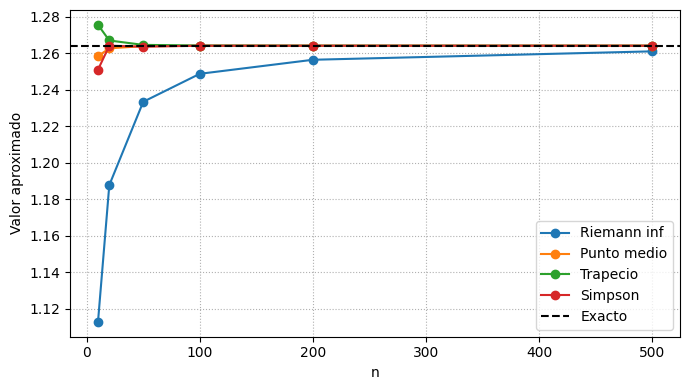

In [54]:
# n mínimo para ~7 decimales (tol = 5e-8)
tol = 5e-8
def min_n(method):
    n = 2
    while abs(method(n) - exact) > tol: n *= 2
    return n
print("\nN mínimos (≈7 decimales):")
for name, meth in [("Riemann inf", riemann_inf), ("Punto medio", midpoint),
                   ("Trapecio", trapezoid), ("Simpson", simpson)]:
    n_star = min_n(meth)
    print(f"- {name}: n ≈ {n_star}")

# Gráfico: 
plt.figure(figsize=(7,4))
plt.plot(ns, [riemann_inf(n) for n in ns], "-o", label="Riemann inf")
plt.plot(ns, [midpoint(n)   for n in ns], "-o", label="Punto medio")
plt.plot(ns, [trapezoid(n)  for n in ns], "-o", label="Trapecio")
plt.plot(ns, [simpson(n)    for n in ns], "-o", label="Simpson")
plt.axhline(exact, color="k", ls="--", label="Exacto")
plt.xlabel("n"); plt.ylabel("Valor aproximado"); plt.grid(True, ls=":")
plt.legend(); plt.tight_layout(); plt.show()

Así de forma experimental obtuvimos que el número mínimo de nodos para alcanzar la precisión de 7 decimales es:

- Riemann inf: n ≈ 33554432

- Punto medio: n ≈ 4096

- Trapecio: n ≈ 8192

- Simpson: n ≈ 64

## Ejercicio 2:

**Utilizar el método de Heun para resolver la EDO de primer orden:**
$$
\begin{cases}
y'(x) = xy(x) + x^2, & \text{en } (0, 1), \\
y(0) = 1
\end{cases}
$$
**Graficar la solución exacta y aproximada, utilizando 50, 100, 150 y 200 nodos internos del intervalo.**

De forma breve, la solución exacta de esta EDO es:

- Factor integrante: $\mu(x)=e^{-\frac{x^2}{2}}$.
- Forma integrada: $(y\mu)'=x^2\mu \Rightarrow y(x)=e^{\frac{x^2}{2}}\Big(1+\int_0^x s^2 e^{-\frac{s^2}{2}}\,ds\Big)$.
- Usando integración por partes y la función error:
  $$\int_0^x s^2 e^{-\frac{s^2}{2}}\,ds=-x\,e^{-\frac{x^2}{2}}+\int_0^x e^{-\frac{s^2}{2}}\,ds
  =-x\,e^{-\frac{x^2}{2}}+\sqrt{\frac{\pi}{2}}\;\mathrm{erf}\!\left(\frac{x}{\sqrt{2}}\right).$$
- Solución exacta:
  $$y_{\text{exact}}(x)= -x + e^{\frac{x^2}{2}}\left(1+\sqrt{\frac{\pi}{2}}\;\mathrm{erf}\!\left(\frac{x}{\sqrt{2}}\right)\right).$$


De otro lado, recordemos que el método de Heun es:

Heun (trapezoidal explícito, orden 2):
- Paso $h=\frac{b-a}{N_{\text{int}}+1}$ con $N_{\text{int}}$ nodos internos en $(a,b)$.
- Actualización:
  $$y_{n+1}=y_n+\frac{h}{2}\Big[f(x_n,y_n)+f(x_{n+1},\,y_n+h\,f(x_n,y_n))\Big],\quad f(x,y)=x\,y+x^2.$$


La implementación computacional de estas ideas es la siguiente:

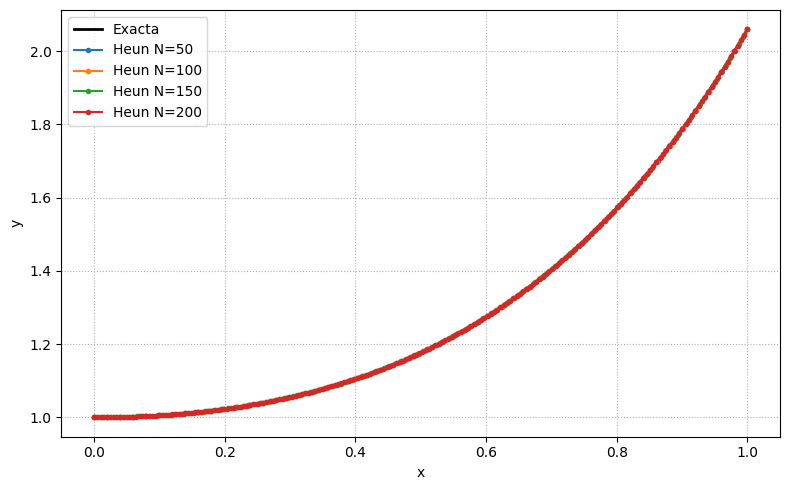

In [55]:
import numpy as np, matplotlib.pyplot as plt
from scipy.special import erf

# Solución exacta
def y_exact(x):
    return -x + np.exp(x**2/2) * (1 + np.sqrt(np.pi/2) * erf(x/np.sqrt(2)))

# f(x,y) y Heun
def fxy(x, y): return x*y + x**2
def heun(a, b, y0, Nint):
    h = (b - a) / (Nint + 1)
    x = np.linspace(a, b, Nint + 2)
    y = np.empty_like(x); y[0] = y0
    for i in range(len(x) - 1):
        k1 = fxy(x[i], y[i])
        y_pred = y[i] + h*k1
        k2 = fxy(x[i] + h, y_pred)
        y[i+1] = y[i] + h*(k1 + k2)/2
    return x, y, h

# Experimento: 50, 100, 150, 200 nodos internos
Ns = [50, 100, 150, 200]
xe = np.linspace(0, 1, 1000); ye = y_exact(xe)

# print("| N_int | h | y(1) Heun | y_exact(1) | error |")
# print("|---:|---:|---:|---:|---:|")
plt.figure(figsize=(8,5))
plt.plot(xe, ye, "k-", label="Exacta", linewidth=2)

for N in Ns:
    x, y, h = heun(0, 1, 1.0, N)
    plt.plot(x, y, "-o", markersize=3, label=f"Heun N={N}")
    err = abs(y[-1] - y_exact(1.0))
    # print(f"| {N} | {h:.6f} | {y[-1]:.10f} | {y_exact(1.0):.10f} | {err:.3e} |")

plt.grid(True, ls=":")
plt.legend(); plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout(); plt.show()

Adicionalmente, hemos calculado los valores en el extremo y(1), donde en teoría, se tiene el valor de error mas grande, esto a fin de comparar la precisión de las aproximaciones

| N_int | h | y(1) Heun | y_exact(1) | error |
|---:|---:|---:|---:|---:|
| 50 | 0.019608 | 2.0594241702 | 2.0594074053 | 1.676e-05 |
| 100 | 0.009901 | 2.0594119324 | 2.0594074053 | 4.527e-06 |
| 150 | 0.006623 | 2.0594094694 | 2.0594074053 | 2.064e-06 |
| 200 | 0.004975 | 2.0594085812 | 2.0594074053 | 1.176e-06 |

Para intentar apreciar mejor las posibles diferencias entre el usos de nodos, graficaremos por separado los resultados obtenidos:

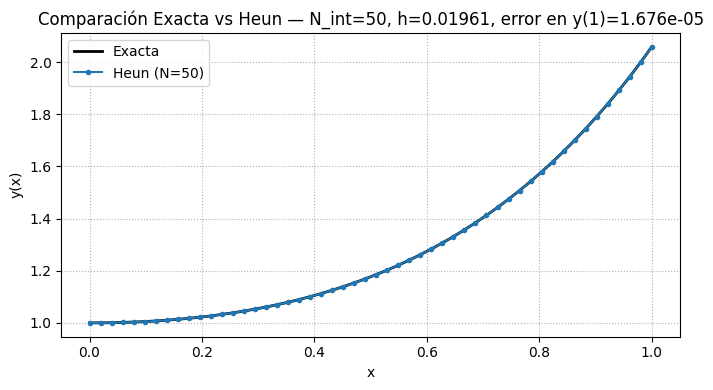

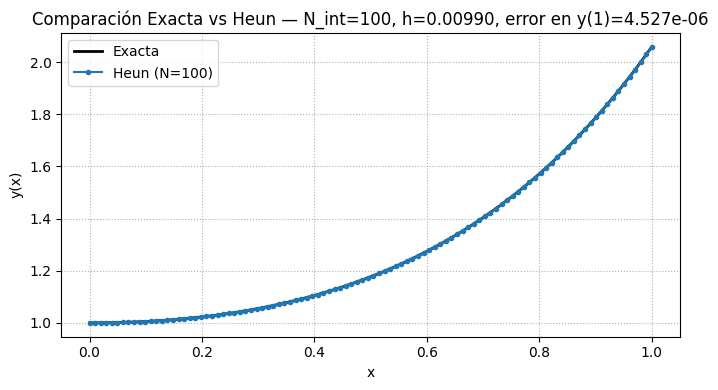

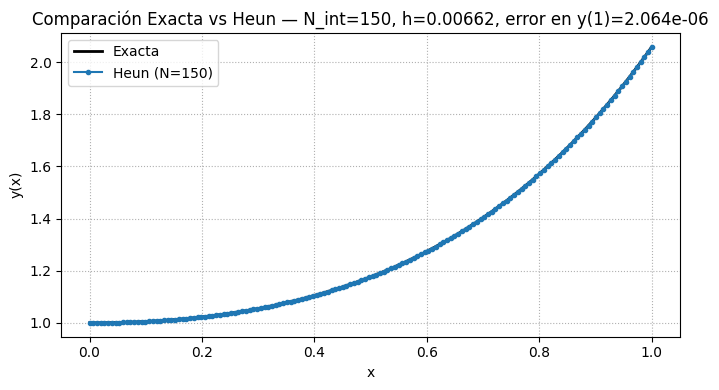

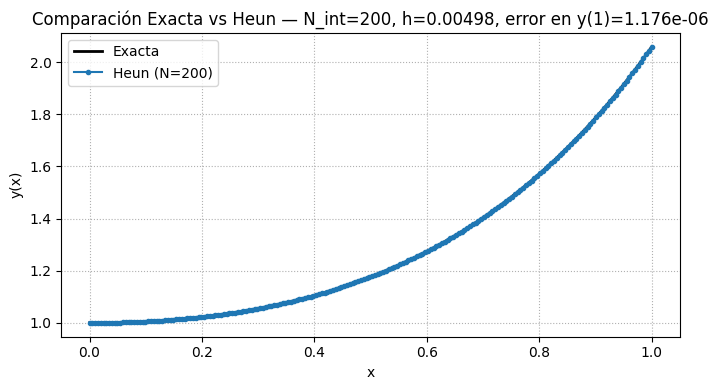

In [56]:
import numpy as np, matplotlib.pyplot as plt

Ns = [50, 100, 150, 200]
xe = np.linspace(0, 1, 1000); ye = y_exact(xe)

for N in Ns:
    x, y, h = heun(0, 1, 1.0, N)
    err = abs(y[-1] - y_exact(1.0))
    plt.figure(figsize=(7,4))
    plt.plot(xe, ye, "k-", label="Exacta", linewidth=2)
    plt.plot(x,  y,  "-o", markersize=3, label=f"Heun (N={N})")
    plt.title(f"Comparación Exacta vs Heun — N_int={N}, h={h:.5f}, error en y(1)={err:.3e}")
    plt.xlabel("x"); plt.ylabel("y(x)")
    plt.grid(True, ls=":")
    plt.legend()
    plt.tight_layout()
    plt.show()